<a href="https://colab.research.google.com/github/mgbhat97/Airbnb-Booking-EDA/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Airbnb Project

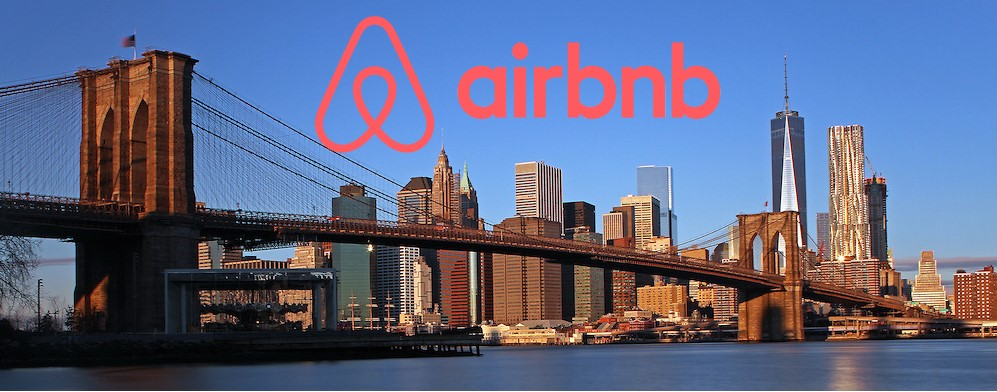

In [1]:
# Importing all required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
from matplotlib.dates import date2num
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting the drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the data which is in csv format from drive 
filepath_data = '/content/drive/MyDrive/AlmaBetter/Capstone Project/Airbnb EDA Project/Copy of Airbnb NYC 2019.csv'
filepath_data1 = '/content/drive/MyDrive/Colab Notebooks/Projects /Capstone/Data analysis /AirBnb/Airbnb NYC 2019.csv'
try:
  airbnb_df = pd.read_csv(filepath_data)
except:
  airbnb_df = pd.read_csv(filepath_data1)

## Understanding the dataset🔍

In [110]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)


In [5]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
# Let's first check with the size of the dataset. 
airbnb_df.shape

(48895, 16)

In [7]:
# Let's get information about over all data set 
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##Duplicate Anlysis and Null Value treatment. 

In [8]:
# Check for duplicate rows
len(airbnb_df[airbnb_df.duplicated()])

0

In [9]:
# Number of null values in each column
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# Replacing Null Values in reviews per month column with 0
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

In [11]:
# Replacing Null Values in name column with Unknown
airbnb_df['name'] = airbnb_df['name'].fillna('Unknown')

In [12]:
# Replacing Null Values in name column with Unknown
airbnb_df['host_name'] = airbnb_df['host_name'].fillna('Unknown')

In [13]:
# Duplicates in ID. 
id_duplicates = len(pd.unique(airbnb_df['id']))

print(f"No.of.unique values in ID:{id_duplicates}")

# This tells there are no Duplicates in ID .  

No.of.unique values in ID:48895


This confirms that there are no Duplicates in ID . 

1. Last_review has many null values, Since it is of type Date we can't either add Zeros or any string to it. So we deicded to drop that column for time being and later use it when needed. 
2. We are dropping "ID" Column, As it contains all unique values and it can't be used to get any informative insights 

In [14]:
# Creating a copy of original dataframe for further analysis
airbnb_file = airbnb_df.copy()

In [15]:
# Dropping Last review column because it has lot of null values and it is not significantly helping us in Analysis.
# Dropping 'id' Column because it has all unique values which is not significant for further analysis 
airbnb_file.drop(['last_review','id'],axis='columns', inplace=True)

In [16]:
airbnb_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [17]:
# Checking any Duplicates in Names 
name_dup = len(pd.unique(airbnb_file['name']))
print(f'No.of.unique values in Names : {name_dup}')

No.of.unique values in Names : 47906


This shows there are few names are repeated with diffrent Id's (Let's say name Host name from Diffrent Host), Now let's find Them

In [18]:
repeated_names = id_duplicates - name_dup
print(f'No.of Reapted names : {repeated_names}')
Top_Ten_Host_with_same_name = airbnb_file['name'].value_counts(ascending=False)
Top_Ten_Host_with_same_name.head(10)

No.of Reapted names : 989


Hillside Hotel                                18
Home away from home                           17
Unknown                                       16
New york Multi-unit building                  16
Brooklyn Apartment                            12
Private Room                                  11
Loft Suite @ The Box House Hotel              11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Beautiful Brooklyn Brownstone                  8
Name: name, dtype: int64

This show 989 names have same name as Others but has diffrent unique Id. 


Futher we can Check Out Top 10 repeated names.

In [19]:
# Duplicates in Host ID. 
host_id_duplicates = len(pd.unique(airbnb_file['host_id']))

print(f"No.of.unique values :{host_id_duplicates}")

No.of.unique values :37457


In [20]:
# Duplicates in Names 
host_name_dup = len(pd.unique(airbnb_file['host_name']))
print(f'No.of.unique values : {host_name_dup}')

No.of.unique values : 11453


In [21]:
repeated_host_names = host_id_duplicates - host_name_dup
print(f'No.of Reapted Host names : {repeated_host_names}')
# This show 26004 names have same name as Others but has diffrent unique Id. 
# So futher analysis should be based on Id to avoid confusions about repeating names. Also Let's Just Check Out Top 10 repeated names

No.of Reapted Host names : 26004


Time to find the Host id and name times, Well we already have calculated host listing count, So we just need to Verify if no of duplicates and calculated host listing count are same then no need to do Futher analysis on this.

In [22]:
# Highest host lists
Top_Host_ID_counts = airbnb_df[['host_id']].value_counts(ascending=False).to_frame()
Top_Host_ID_counts.head(10)

,0
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65


In [23]:
pd.unique(airbnb_file['calculated_host_listings_count'])


array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

This Clarify us that the Calculated Host Listing and Host count is same. 

#Overview Analysis ⚙

In [24]:
# Corelation between various parameters
required_airbnb_df = airbnb_file[['availability_365','price','number_of_reviews','minimum_nights','reviews_per_month']]

In [25]:
corelate_airbnb_df = required_airbnb_df.corr()

In [26]:
corelate_airbnb_df

,availability_365,price,number_of_reviews,minimum_nights,reviews_per_month
availability_365,1.000000,0.081829,0.172028,0.144303,0.163732
price,0.081829,1.000000,-0.047954,0.042799,-0.050564
number_of_reviews,0.172028,-0.047954,1.000000,-0.080116,0.589407
minimum_nights,0.144303,0.042799,-0.080116,1.000000,-0.124905
reviews_per_month,0.163732,-0.050564,0.589407,-0.124905,1.000000


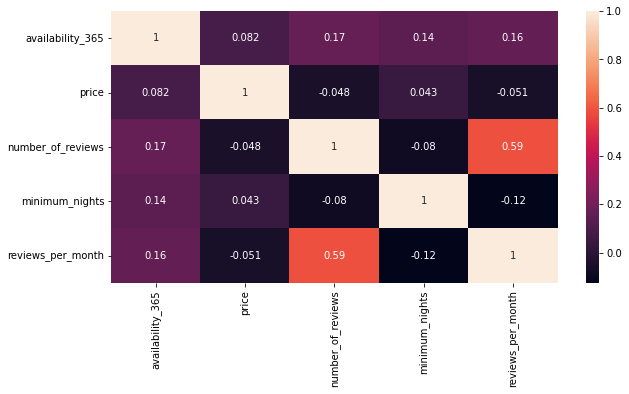

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(corelate_airbnb_df, annot=True)

# Neighbourhood Analysis / Traffic Analysis📈

In [28]:
neighbourhood_group_count = airbnb_file.neighbourhood_group.value_counts(sort=True)
neighbourhood_group_count.to_frame
neighbourhood_group_count.head()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [29]:
neighbourhood_group_unique_list = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]

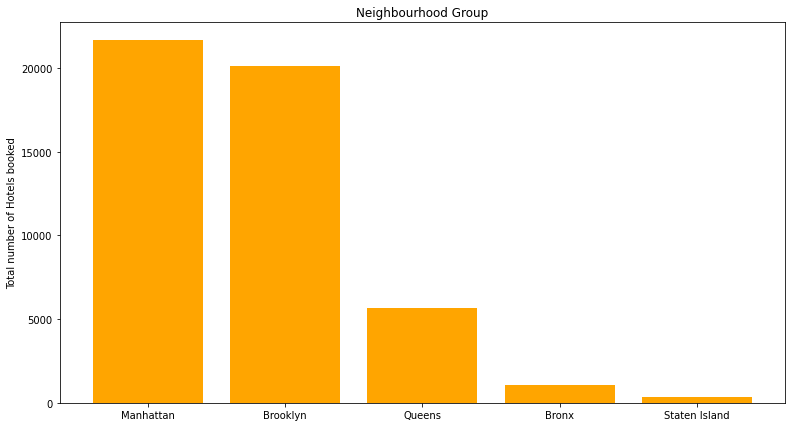

In [30]:
# comparing number of count of hotels across various neighbourhood
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
plt.ylabel("Total number of Hotels booked")
plt.bar(neighbourhood_group_unique_list,neighbourhood_group_count,color ='orange')
plt.show()

The Bar plot distinctly Confess us that we can diffrentiate New York City into  5 Neighbourhood groups. Brooklyn and Manhattan has the Highest Number of Host Traffic when compared to Other three. 

Now let's See How this Neighbourhood Groups are divided by plotting them in New York City Map

In [31]:
pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-inzgwral
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-inzgwral
     |████████████████████████████████| 16.7 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 35.6 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.2+57.gcb0c8b5-py2.py3-none-any.whl size=1034042 sha256=eace254463e5dfd3eb356129a96abd86ab9120026642014cfe7bd6cc8865688c
  Stored in directory: /tmp/pip-ephem-wheel-cache-5agqz48p/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas


In [32]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
try:
  street_map = gpd.read_file('/content/drive/MyDrive/AlmaBetter/Capstone Project/Airbnb EDA Project/Boundaries/geo_export_41b44c37-7378-44ab-b93a-acb9c59a86cc.shp')
except:
  street_map = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Projects /Capstone/Data analysis /AirBnb/Borough Boundaries/geo_export_41b44c37-7378-44ab-b93a-acb9c59a86cc.shp')


In [33]:
# designate coordinate system
crs1 = {'init':"EPSG:4326"}
# zip x and y coordinates into single feature 
geometry1 = [Point(xy) for xy in zip(airbnb_file['longitude'], airbnb_file['latitude'])]
# create GeoPandas dataframe
airbnb_file_geo_plot1 = gpd.GeoDataFrame(airbnb_df,crs = crs1,geometry = geometry1)

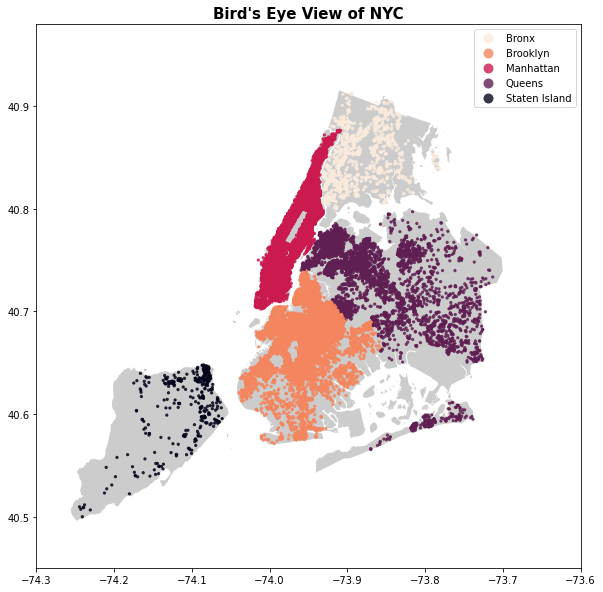

In [34]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(10,10))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')

# add geodataframe to axes, assigning ‘price’ variable to represent coordinates on graph, adding legend, making datapoints transparent using alpha, assigning size of points using markersize
airbnb_file_geo_plot1.plot(column='neighbourhood_group',ax=ax,alpha=0.8,legend=True,markersize=5,  cmap='rocket_r')
# add title to graph
plt.title("Bird's Eye View of NYC", fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.3,-73.6)
plt.ylim( 40.45,40.98)
# show map
plt.show()

The Above insight of the New York City Map clearly shows us five diffrent Neighbourhood Groups and also the demand for the Airbnb Host's in  Manhattan and Brooklyn when compared to others 

In [35]:
# Types of rooms available at Airbnb NYC
airbnb_file['room_type'].unique() 

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

So We have three Options for Room types it's

1.   Private Room
2.   Entire Home/apt
3.   Shared room


In [36]:
# Overall average price of rooms
airbnb_file['price'].mean()

152.7206871868289

In [37]:
# Number of rooms in each category of room
airbnb_file.groupby(['neighbourhood_group'])['neighbourhood'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

Now let's find the count of each Neighbourhood and also let's find Neighbourhood group and sort them so that we can find the highest to lowest traffic of neighbourhood.

In [38]:
multi_group_var = airbnb_file[['neighbourhood_group','neighbourhood']].groupby(['neighbourhood_group','neighbourhood'])['neighbourhood'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [39]:
# Top 10 traffic across neighbourhood
multi_group_var.head(10)

,neighbourhood_group,neighbourhood,count
93,Brooklyn,Williamsburg,3920
50,Brooklyn,Bedford-Stuyvesant,3714
105,Manhattan,Harlem,2658
58,Brooklyn,Bushwick,2465
124,Manhattan,Upper West Side,1971
106,Manhattan,Hell's Kitchen,1958
100,Manhattan,East Village,1853
123,Manhattan,Upper East Side,1798
65,Brooklyn,Crown Heights,1564
112,Manhattan,Midtown,1545


Williamsburg has the highest traffic with 3920 times hosted, followed by Bedford-Stuyvesant with 3714 times hosted. Brooklyn and Manhattan Dominates the top 10 number of Hosts.

Now let's analyse top 10 host traffic for each Neighbourhood Group.

In [40]:
# Unique neighbourhood group 
Unique_neighbourhood_group = pd.unique(airbnb_file['neighbourhood_group']).tolist()
Unique_neighbourhood_group

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [41]:
# Function to plot traffic in a particular neighbourhood group
def plot_neighbourhood_group(file_name, neighbourhood_group_name):
  neighbourhood_group_name = str(neighbourhood_group_name)
  plt.figure(figsize=(17,12))
  file_name = file_name.sort_values('count' ,ascending= False)
  ax = sns.barplot(x="neighbourhood", y="count", data=file_name, palette=sns.color_palette("pastel", 10))
  plt.xticks(rotation='vertical')
  plt.title(neighbourhood_group_name+ " Neighbourhood Analysis")
  ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
  ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
  plt.show()

In [42]:
# Broolyn neigbourhood group traffic analysis
Brooklyn_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Brooklyn' ] 
Brooklyn_neighbourhood_top10.head(10)

,neighbourhood_group,neighbourhood,count
93,Brooklyn,Williamsburg,3920
50,Brooklyn,Bedford-Stuyvesant,3714
58,Brooklyn,Bushwick,2465
65,Brooklyn,Crown Heights,1564
78,Brooklyn,Greenpoint,1115
72,Brooklyn,Flatbush,621
61,Brooklyn,Clinton Hill,572
86,Brooklyn,Prospect-Lefferts Gardens,535
84,Brooklyn,Park Slope,506
70,Brooklyn,East Flatbush,500


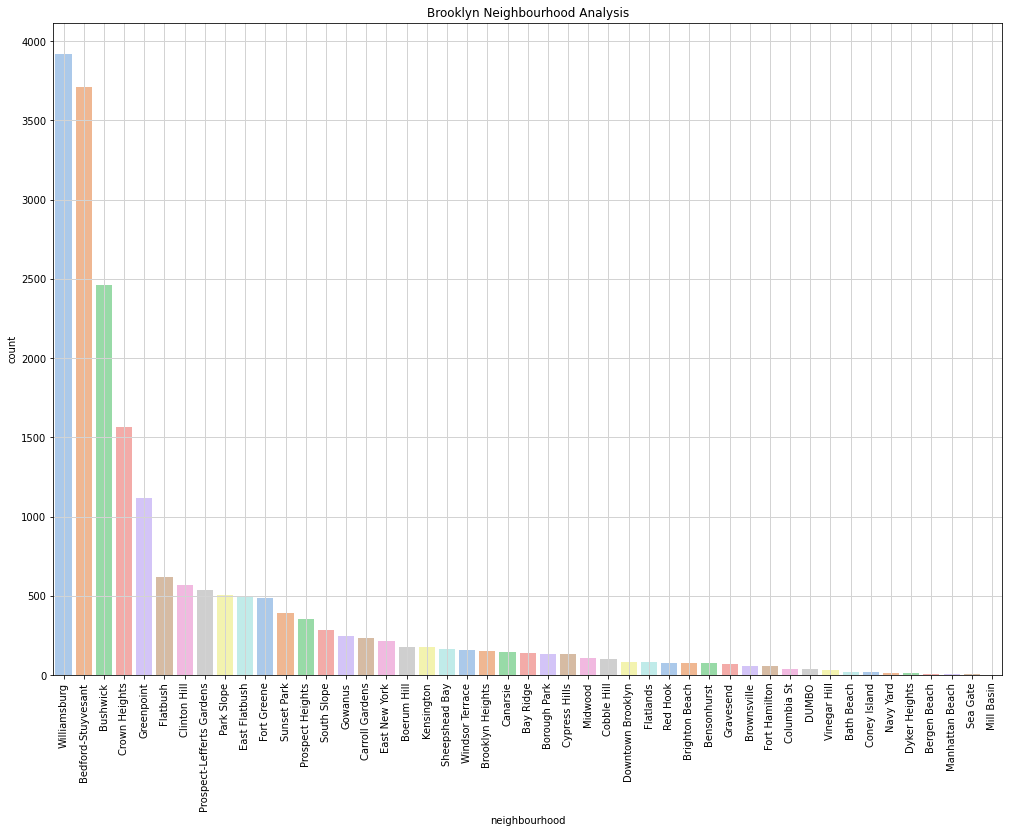

In [43]:
plot_neighbourhood_group(file_name= Brooklyn_neighbourhood_top10 , neighbourhood_group_name= "Brooklyn")

In [44]:
# Manhattan neigbourhood group traffic analysis
Manhattan_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Manhattan' ] 
No_of_Neighbourhood_in_Manhattan = len(pd.unique(Manhattan_neighbourhood_top10['neighbourhood']))
print(f'No.of.unique neighbourhood in Manhattan: {No_of_Neighbourhood_in_Manhattan}')
print("Top 10 count's in Manhattan neighbourhood are:")
Manhattan_neighbourhood_top10.head(10)

No.of.unique neighbourhood in Manhattan: 32
Top 10 count's in Manhattan neighbourhood are:


,neighbourhood_group,neighbourhood,count
105,Manhattan,Harlem,2658
124,Manhattan,Upper West Side,1971
106,Manhattan,Hell's Kitchen,1958
100,Manhattan,East Village,1853
123,Manhattan,Upper East Side,1798
112,Manhattan,Midtown,1545
99,Manhattan,East Harlem,1117
96,Manhattan,Chelsea,1113
110,Manhattan,Lower East Side,911
125,Manhattan,Washington Heights,899


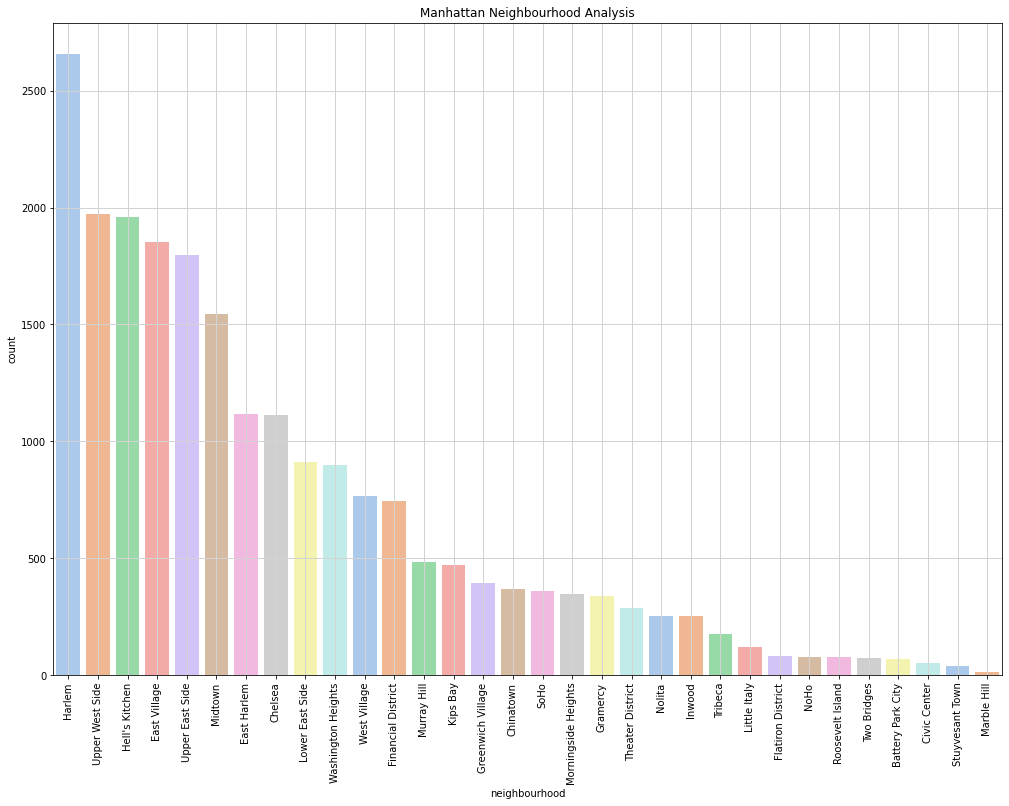

In [45]:
plot_neighbourhood_group(file_name= Manhattan_neighbourhood_top10 , neighbourhood_group_name= "Manhattan")

In [46]:
# Queens neigbourhood group traffic analysis
Queens_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Queens' ] 
No_of_Neighbourhood_in_Queens = len(pd.unique(Queens_neighbourhood_top10['neighbourhood']))
print(f'No.of.unique neighbourhood in Queens: {No_of_Neighbourhood_in_Queens}')
print("Top 10 count's in Queens neighbourhood are:")
Queens_neighbourhood_top10.head(10)

No.of.unique neighbourhood in Queens: 51
Top 10 count's in Queens neighbourhood are:


,neighbourhood_group,neighbourhood,count
128,Queens,Astoria,900
160,Queens,Long Island City,537
145,Queens,Flushing,426
168,Queens,Ridgewood,423
174,Queens,Sunnyside,363
139,Queens,Ditmars Steinway,309
143,Queens,Elmhurst,237
177,Queens,Woodside,235
153,Queens,Jamaica,231
152,Queens,Jackson Heights,186


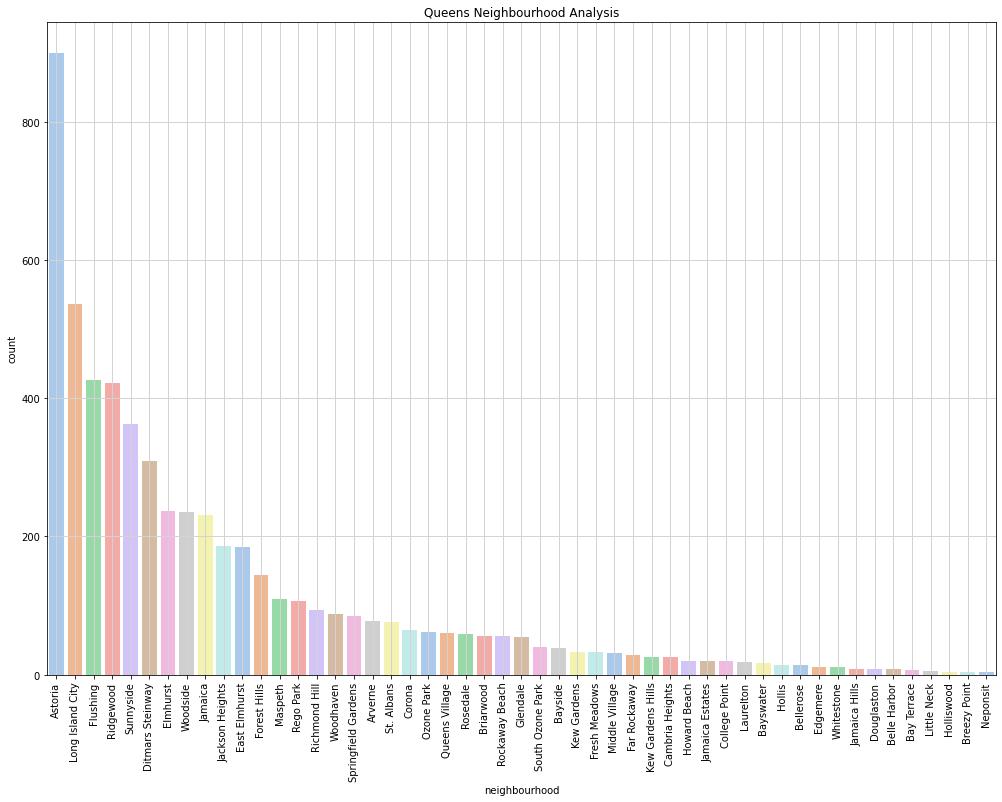

In [47]:
plot_neighbourhood_group(file_name=Queens_neighbourhood_top10, neighbourhood_group_name= "Queens" )

In [48]:
# Staten island neigbourhood group traffic analysis
Staten_Island_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Staten Island' ] 
No_of_Neighbourhood_in_Staten_Island = len(pd.unique(Staten_Island_neighbourhood_top10['neighbourhood']))
print(f'No.of.unique neighbourhood in Staten Island: {No_of_Neighbourhood_in_Staten_Island}')
print("Top 10 count's in Staten_Island neighbourhood are:")
Staten_Island_neighbourhood_top10.head(10)

No.of.unique neighbourhood in Staten Island: 43
Top 10 count's in Staten_Island neighbourhood are:


,neighbourhood_group,neighbourhood,count
212,Staten Island,St. George,48
215,Staten Island,Tompkinsville,42
213,Staten Island,Stapleton,27
184,Staten Island,Concord,26
179,Staten Island,Arrochar,21
205,Staten Island,Randall Manor,19
217,Staten Island,West Brighton,18
183,Staten Island,Clifton,15
191,Staten Island,Great Kills,10
203,Staten Island,Port Richmond,9


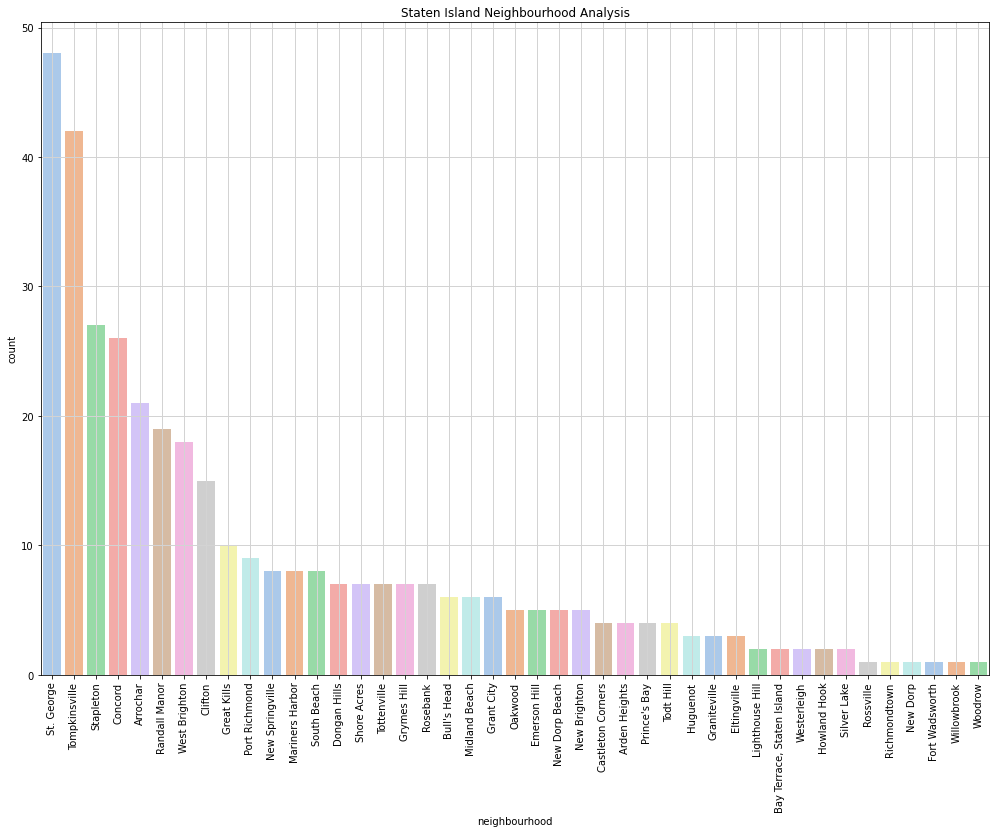

In [49]:
plot_neighbourhood_group(file_name=Staten_Island_neighbourhood_top10, neighbourhood_group_name= "Staten Island" )

In [50]:
# Bronx neigbourhood group traffic analysis
Bronx_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Bronx' ] 
No_of_Neighbourhood_in_Bronx = len(pd.unique(Bronx_neighbourhood_top10['neighbourhood']))
print(f'No.of.unique neighbourhood in Bronx: {No_of_Neighbourhood_in_Bronx}')
print("Top 10 count's in Bronx neighbourhood are:")
Bronx_neighbourhood_top10.head(10)

No.of.unique neighbourhood in Bronx: 48
Top 10 count's in Bronx neighbourhood are:


,neighbourhood_group,neighbourhood,count
18,Bronx,Kingsbridge,70
15,Bronx,Fordham,63
19,Bronx,Longwood,62
24,Bronx,Mott Haven,60
43,Bronx,Wakefield,50
9,Bronx,Concourse,50
33,Bronx,Port Morris,46
0,Bronx,Allerton,42
46,Bronx,Williamsbridge,40
30,Bronx,Parkchester,39


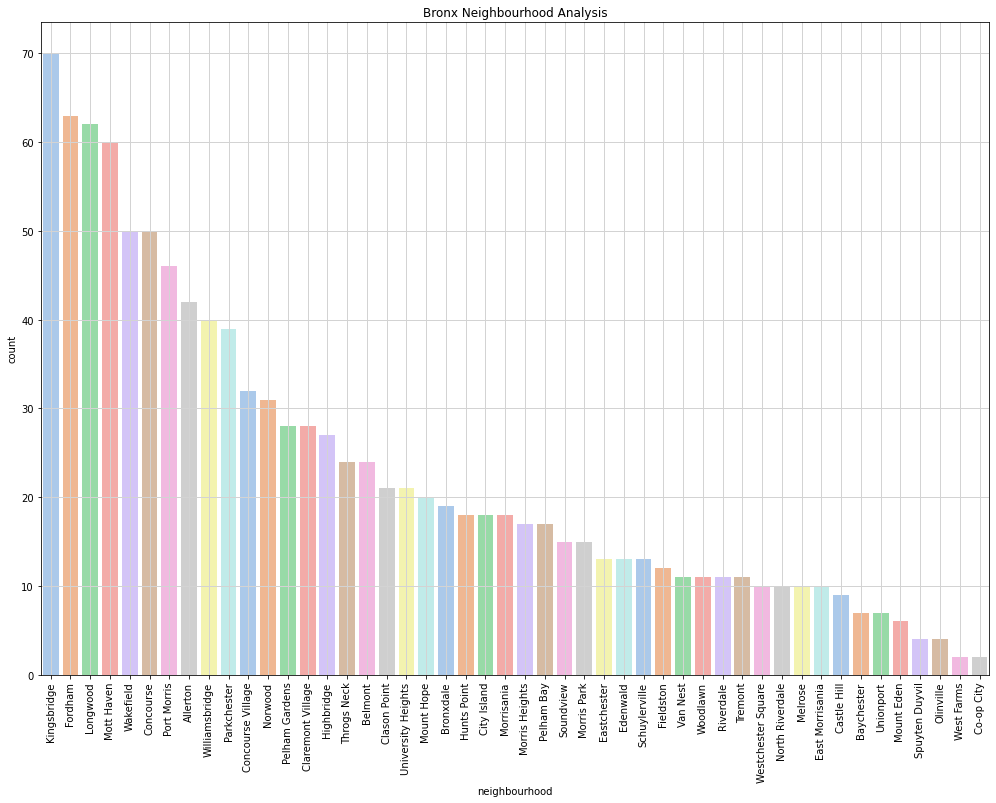

In [51]:
plot_neighbourhood_group(file_name=Bronx_neighbourhood_top10, neighbourhood_group_name= "Bronx" )

#Price Analysis💲💵

In [52]:
# Overall average price of rooms
airbnb_file['price'].mean()

152.7206871868289

In [53]:
# Mean price across neighbourhood group
avg_price_ngb_grp_airbnb_df = airbnb_file.groupby('neighbourhood_group')['price'].mean().reset_index()
avg_price_ngb_grp_airbnb_df.rename(columns={'price':'average_price'})

,neighbourhood_group,average_price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


(-0.5, 4.5, 0.0, 600.0)

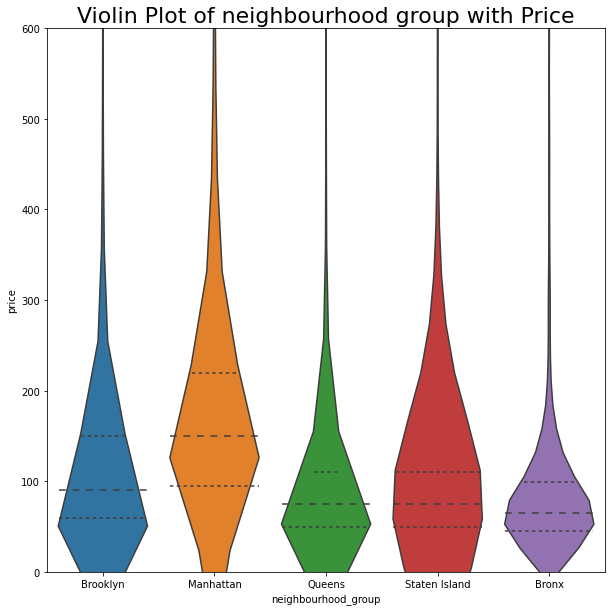

In [54]:
# Violin plot of price distribution across different neighbourhood 
airbnb_box_plot_price_neig = pd.concat([airbnb_file['neighbourhood_group'], airbnb_file['price']], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.violinplot( x= 'neighbourhood_group', y="price", data=airbnb_box_plot_price_neig , scale='width', inner='quartile')
plt.title('Violin Plot of neighbourhood group with Price', fontsize=22)
fig.axis(ymin=0, ymax=600)

In [55]:
# Average Price for each Neighbourhood. 
avg_price_ngb_airbnb_df = airbnb_df.groupby('neighbourhood')['price'].mean().reset_index()
avg_price_ngb_airbnb_df.rename(columns={'price':'average_price'})
avg_price_ngb_airbnb_df = avg_price_ngb_airbnb_df.sort_values('price' ,ascending= False)
avg_price_ngb_airbnb_df.head(10)

,neighbourhood,price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909
157,Prince's Bay,409.500000
6,Battery Park City,367.557143
75,Flatiron District,341.925000
161,Randall Manor,336.000000
144,NoHo,295.717949


In [56]:
# Average price across different type of rooms
avg_room_price_room_airbnb_df = airbnb_df.groupby('room_type')['price'].mean().reset_index()
avg_room_price_room_airbnb_df.rename(columns={'price':'average_price'})

,room_type,average_price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


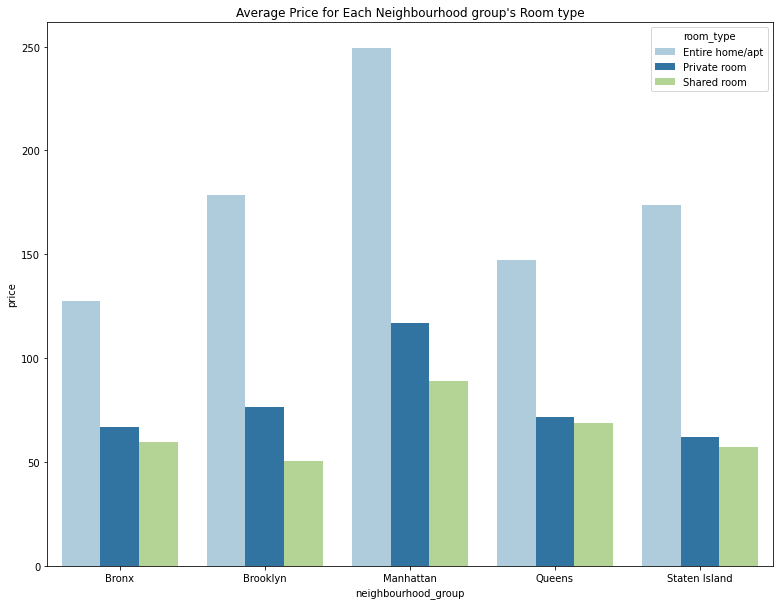

In [57]:
# Plot of average price of room type by each neighbourhood group 
avg_room_price_ngb_airbnb_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
avg_room_price_ngb_airbnb_df.rename(columns={'price':'average_price'})
plt.figure(figsize=(13,10))
plt.title("Average Price for Each Neighbourhood group's Room type")
sns.barplot(x="neighbourhood_group", y="price", data=avg_room_price_ngb_airbnb_df ,hue=avg_room_price_ngb_airbnb_df.room_type ,palette=sns.color_palette("Paired", 10) )
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [58]:
# Top 10 Lowest priced Hotels
Price_analysis = airbnb_file.sort_values('price', ascending =False)
Price_analysis = Price_analysis[['name','price']]
Price_analysis.tail()

,name,price
25778,Modern apartment in the heart of Williamsburg,0
25796,Cozy yet spacious private brownstone bedroom,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,0
26841,Coliving in Brooklyn! Modern design / Shared room,0
25795,Contemporary bedroom in brownstone with nice view,0


In [59]:
# Count for each price
Price_analysis_count_checker = airbnb_file[['name','price']].groupby(['price'])['price'].count().reset_index(name='count_of_each_price').sort_values(['price'], ascending=[False])
Price_analysis_count_checker.head()


,price,count_of_each_price
673,10000,3
672,9999,3
671,8500,1
670,8000,1
669,7703,1


In [60]:
Price_analysis_count_checker.tail()

,price,count_of_each_price
4,13,1
3,12,4
2,11,3
1,10,17
0,0,11


In [61]:
Price_analysis_count_checker.shape

(674, 2)

As we know zero can't be the lowest price. there are 11 counts with Zero as the Price. There are few possibilies why we have lowest price as Zero either there is an error while taking up the Error or it's the discounts which is 100% or it's free stay's .But anyway let's Drop Zero Prices.

In [62]:
# Removing 0 priced data
Price_analysis_count_checker = Price_analysis_count_checker[Price_analysis_count_checker.price != 0]
# Price_analysis_count_checker.tail(10)
Price_analysis_count_checker.shape

(673, 2)

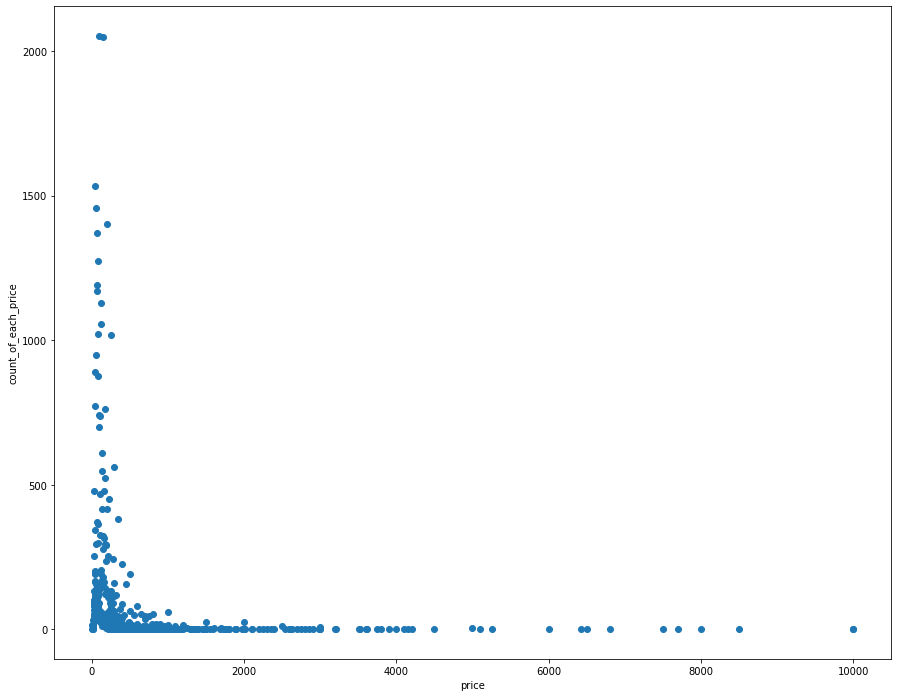

In [63]:
# Frequency of data across different price range
plt.figure(figsize=(15,12))
Price_analysis_count_checker = Price_analysis_count_checker.sort_values('price' ,ascending= False)
gridobj = plt.scatter(x="price", y="count_of_each_price", data=Price_analysis_count_checker)
plt.xlabel("price")
plt.ylabel("count_of_each_price")
plt.show()

In [64]:
# Sorting by count of each price in descending order
Price_analysis_count_checker = Price_analysis_count_checker.sort_values('count_of_each_price' ,ascending= False)
Price_analysis_count_checker.head()

,price,count_of_each_price
89,100,2051
139,150,2047
39,50,1534
49,60,1458
189,200,1401


The Plot above clearly tells us that even if the prices are high, only few of them have high prices. Most of the Prices fall under 1000 and most common price ranges from 50- 200

In [65]:
# Remove the most extreme 1% prices,the most extreme .1% latitudes, & the most extreme .1% longitudes
airbnb_file_geo_plot = airbnb_file[(airbnb_file['price'] >= np.percentile(airbnb_file['price'], 0.5)) & 
 (airbnb_file['price'] <= np.percentile(airbnb_file['price'], 99.5))]

In [66]:
# Designate coordinate system
crs1 = {'init':"EPSG:4326"}
# zip x and y coordinates into single feature 
geometry1 = [Point(xy) for xy in zip(airbnb_file_geo_plot['longitude'], airbnb_file_geo_plot['latitude'])]
# create GeoPandas dataframe
airbnb_file_geo_plot1 = gpd.GeoDataFrame(airbnb_file_geo_plot,crs = crs1,geometry = geometry1)

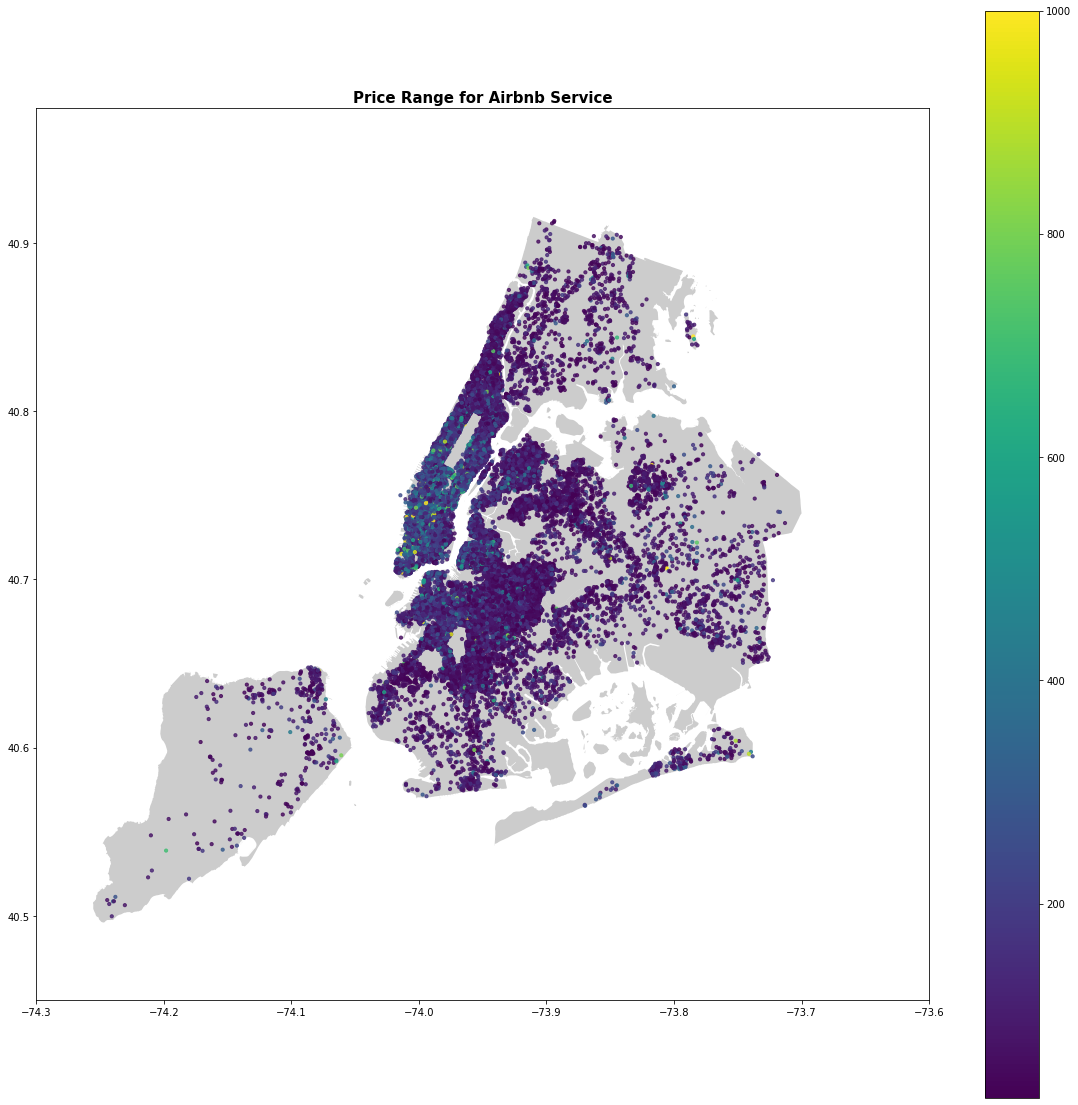

In [67]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20,20))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')

# Add geodataframe to axes, assigning ‘price’ variable to represent coordinates on graph, adding legend, making datapoints transparent using alpha, assigning size of points using markersize
airbnb_file_geo_plot1.plot(column='price',ax=ax,alpha=0.8,legend=True,markersize=10)
# Add title to graph
plt.title('Price Range for Airbnb Service', fontsize=15,fontweight='bold')
# Set latitiude and longitude boundaries for map display
plt.xlim(-74.3,-73.6)
plt.ylim( 40.45,40.98)
plt.show()

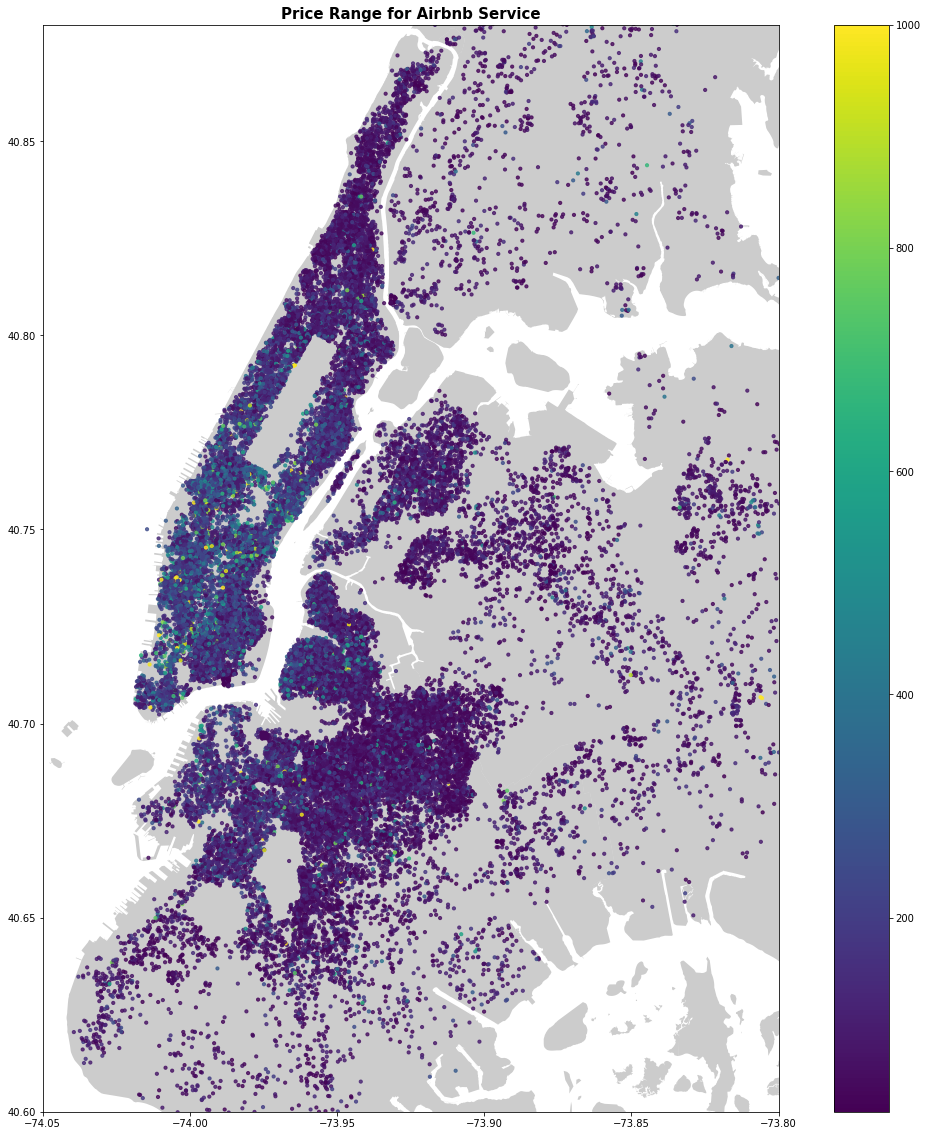

In [68]:
# Let's see only the crowed part with better clarity 
fig, ax = plt.subplots(figsize=(20,20))
street_map.plot(ax=ax, alpha=0.4,color='grey')
airbnb_file_geo_plot1.plot(column='price',ax=ax,alpha=0.8,legend=True,markersize=10)
plt.title('Price Range for Airbnb Service', fontsize=15,fontweight='bold')
plt.xlim(-74.05,-73.8)
plt.ylim( 40.6,40.88)
plt.show()

In [69]:
airbnb_file.sort_values('price', ascending =False, inplace=True)

In [108]:
# Top 10 Costliest Hotels
airbnb_file[['name','neighbourhood_group','neighbourhood','price']].head(10)

,name,neighbourhood_group,neighbourhood,price
9151,Furnished room in Astoria apartment,Queens,Astoria,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,10000
29238,1-BR Lincoln Center,Manhattan,Upper West Side,10000
40433,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,9999
6530,Spanish Harlem Apt,Manhattan,East Harlem,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,8500
4377,Film Location,Brooklyn,Clinton Hill,8000
29662,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,7703
42523,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,7500


In [109]:
#Top 10 Lowest priced Hotels
airbnb_file[['name','neighbourhood_group','neighbourhood','price']].tail(10)

,name,neighbourhood_group,neighbourhood,price
26259,the best you can find,Manhattan,Murray Hill,0
26866,Best Coliving space ever! Shared room.,Brooklyn,Bushwick,0
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,0
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Bedford-Stuyvesant,0
25794,Spacious comfortable master bedroom with nice ...,Brooklyn,Bedford-Stuyvesant,0
25778,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,0
25796,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,0
26841,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,Bushwick,0
25795,Contemporary bedroom in brownstone with nice view,Brooklyn,Bedford-Stuyvesant,0


#Minimum Nights Analysis📅

In [72]:
# Average minimum nights
mini_ngt_airbnb_mean = airbnb_file['minimum_nights'].mean()
mini_ngt_airbnb_mean

7.029962163820431

In [73]:
# Average minimum nights by neighbourhood group
mini_ngt_airbnb_df = airbnb_file.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()
mini_ngt_airbnb_df

,neighbourhood_group,minimum_nights
0,Bronx,4.560953
1,Brooklyn,6.056556
2,Manhattan,8.579151
3,Queens,5.181433
4,Staten Island,4.831099


(-0.5, 4.5, 0.0, 20.0)

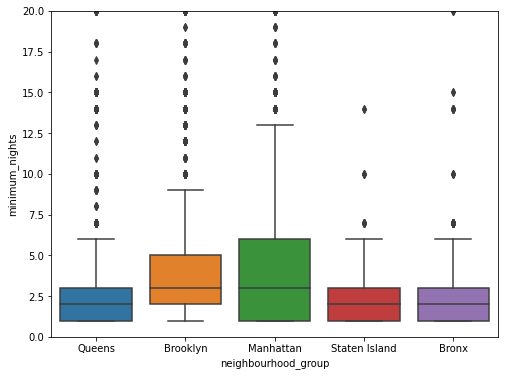

In [74]:
#plot of minimum night
data = pd.concat([airbnb_file['neighbourhood_group'], airbnb_file['minimum_nights']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot( x= 'neighbourhood_group', y="minimum_nights", data=data)
fig.axis(ymin=0, ymax=20)

In [75]:
# minmum nights spent in various type of rooms
mini_ngt_room_airbnb_df = airbnb_df.groupby('room_type')['minimum_nights'].mean().reset_index()

In [76]:
mini_ngt_room_airbnb_df

,room_type,minimum_nights
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


In [77]:
# Most number of days occupied in a stay or maximum number of minimum nights spent
top10_max_min_night_host = airbnb_df[[ 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'availability_365']].sort_values('minimum_nights',ascending=False)

top10_max_min_night_host.head(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365
5767,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,Entire home/apt,180,1250,365
2854,Unknown,6676776,Peter,Manhattan,Battery Park City,Entire home/apt,400,1000,362
38664,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,Shared room,110,999,365
13404,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,Entire home/apt,99,999,42
26341,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,Private room,79,999,249
47620,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,Entire home/apt,140,500,331
14285,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,Private room,45,500,358
8014,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,Entire home/apt,75,500,362
11193,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,Private room,50,500,365
7355,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,Entire home/apt,134,500,90


In [78]:
# Count of hotels booked by each minmum nights
no_of_min_nights_counts_checker = airbnb_file[['name','minimum_nights']].groupby(['minimum_nights'])['minimum_nights'].count().reset_index(name='count_of_minium_nights').sort_values(['minimum_nights'], ascending=[False])
no_of_min_nights_counts_checker.head(10)

,minimum_nights,count_of_minium_nights
108,1250,1
107,1000,1
106,999,3
105,500,5
104,480,1
103,400,1
102,370,1
101,366,1
100,365,29
99,364,1


There are 14 host which have minimum night more than 365 days which is more than an year, This values are definetly an outlier. Also considering minimum nights more than a 200 days defninetly doesn't make practical sense. So let's Drop the values which are more than 200 days.

In [79]:
# Filtering minimum nights which are less than 200
no_of_min_nights_counts_checker_filtered = no_of_min_nights_counts_checker[no_of_min_nights_counts_checker['minimum_nights'] <= 200]
no_of_min_nights_counts_checker_filtered.head(10)

,minimum_nights,count_of_minium_nights
86,200,4
85,198,1
84,186,1
83,185,1
82,184,1
81,183,1
80,182,1
79,181,2
78,180,43
77,175,1


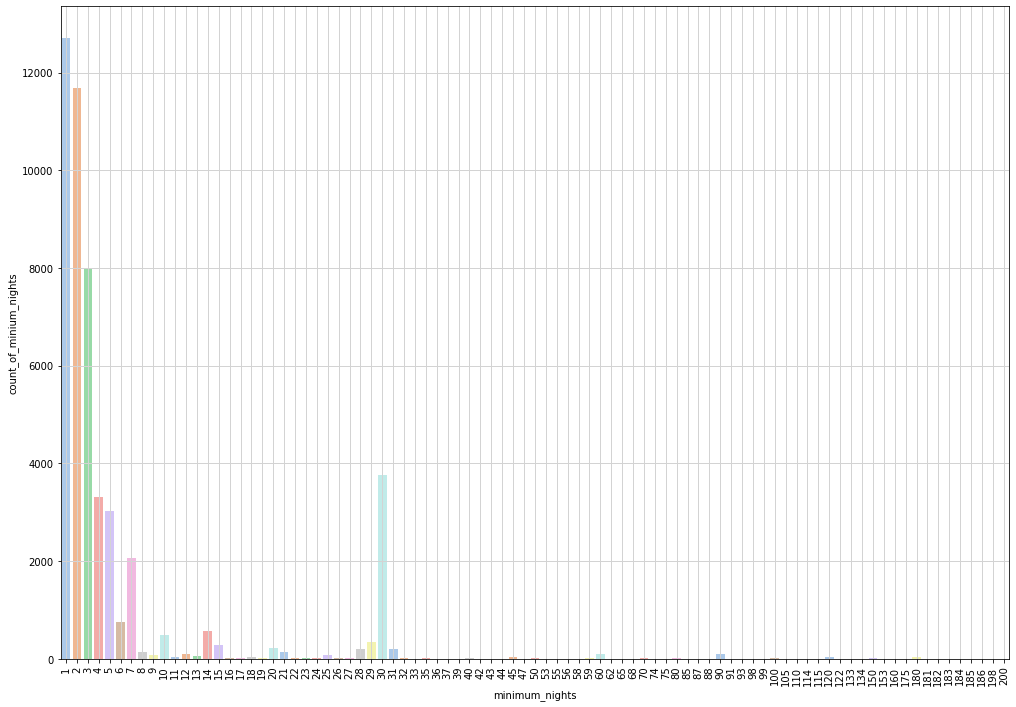

In [80]:
# Plot of minimum nights count upto 200 days 
plt.figure(figsize=(17,12))
ax = sns.barplot(x="minimum_nights", y="count_of_minium_nights", data=no_of_min_nights_counts_checker_filtered, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

The plot shows us that after 30 days (1 month). The Spike is almost zero and we can see small rise in bar at 45, 60, 90,10, 120 and 180 days. This might we be few of the host offer their property in package in months. We can see the bar have elevated enormously for first 30 days, Let's take a deeper look at it in detail.

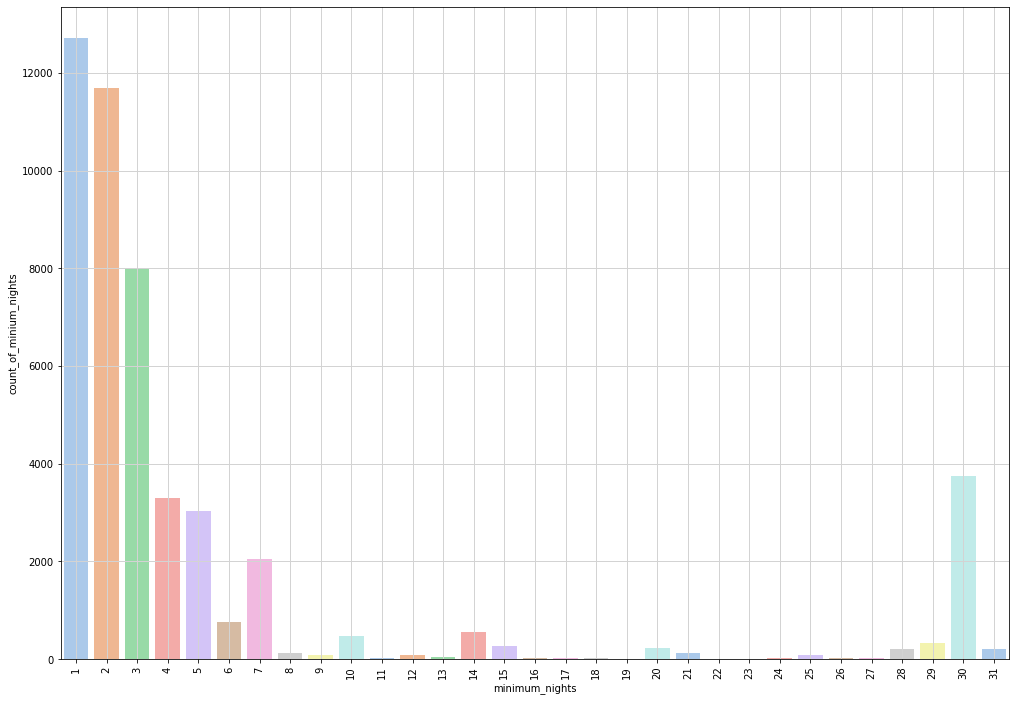

In [81]:
# Let's Consider the bookings for Minimum night only for less than a month
no_of_min_nights_counts_checker_filtered = no_of_min_nights_counts_checker[no_of_min_nights_counts_checker['minimum_nights'] <= 31]
plt.figure(figsize=(17,12))
ax = sns.barplot(x="minimum_nights", y="count_of_minium_nights", data=no_of_min_nights_counts_checker_filtered, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

The plot gives us strong belief that for minium nights less than week is an important part of business as more than 80% of bookings are less than 7 nights as minium. We can aslo see there are nearly 3900 records show bookings for one month as minium nights. We can also see that for every 7 days there is slight elivation in bar. This shows the packages can be based on weeks also.

In [82]:
# Sorting the minimum night count values in descending type
no_of_min_nights_counts_checker_filtered = no_of_min_nights_counts_checker_filtered.sort_values('count_of_minium_nights' ,ascending= False)
no_of_min_nights_counts_checker_filtered.head(10)

,minimum_nights,count_of_minium_nights
0,1,12720
1,2,11696
2,3,7999
29,30,3760
3,4,3303
4,5,3034
6,7,2058
5,6,752
13,14,562
9,10,483


The plot and above Dataframe clearly tells more than 90% of the stays offer minium night less than a month and 1 night as minimum night stands on the top

In [83]:
# Count of minimum nights by room type
no_of_min_nights_counts_rooms = airbnb_file[['name','room_type','minimum_nights']].groupby(['room_type','minimum_nights'])['minimum_nights'].count().reset_index(name='count_of_minium_nights').sort_values(['minimum_nights','count_of_minium_nights'], ascending=[False,False])
no_of_min_nights_counts_rooms = no_of_min_nights_counts_rooms[no_of_min_nights_counts_rooms['minimum_nights'] <= 31]
no_of_min_nights_counts_rooms.head(10)

,room_type,minimum_nights,count_of_minium_nights
29,Entire home/apt,31,154
121,Private room,31,43
184,Shared room,31,4
28,Entire home/apt,30,2651
120,Private room,30,1019
183,Shared room,30,90
27,Entire home/apt,29,302
119,Private room,29,38
26,Entire home/apt,28,117
118,Private room,28,86


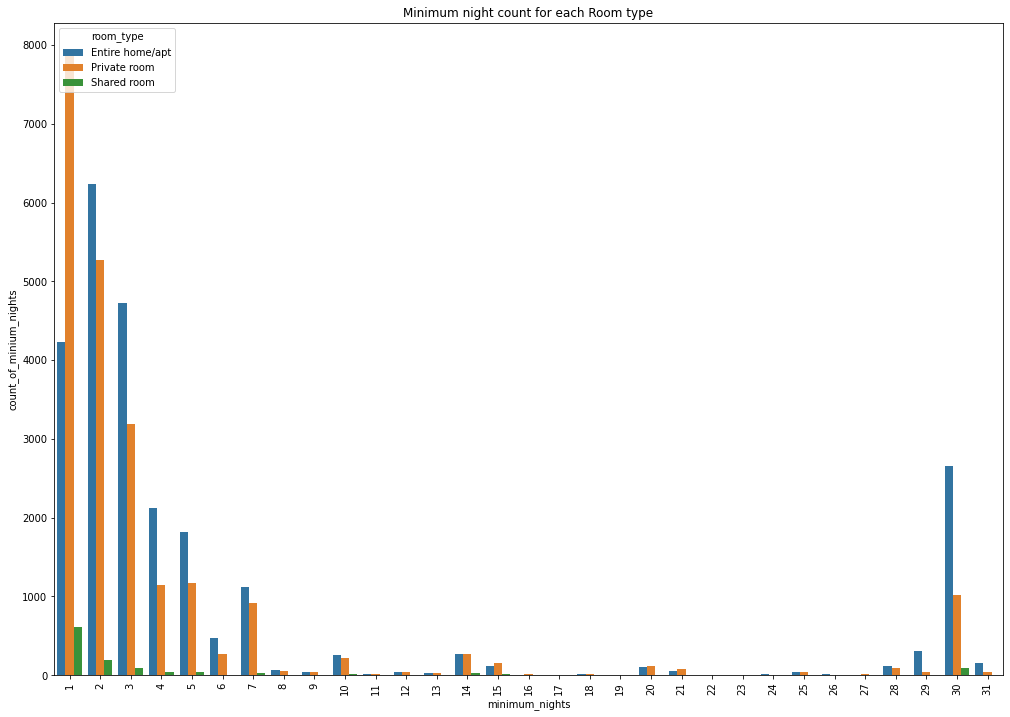

In [84]:
# Distribution count of minimum nights by room type
plt.figure(figsize=(17,12))
plt.title("Minimum night count for each Room type")
sns.barplot(x="minimum_nights", y="count_of_minium_nights", data=no_of_min_nights_counts_rooms ,hue=no_of_min_nights_counts_rooms.room_type )
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

This plot plays important role in determining peoples mindset in booking the kind rooms. We can make the following point here :
  1. If minium night is 1 day. Most of the People are okay with just a private room.
  2. If we can observe shared room numbers is also high  for one night. That shows that coustomers preferring Shared room for one night is night is high. 
  3. From the second day clearly Entire Room/ Apartment dominates in number with compared to other two. This tells us that people prefer privacy and big space if they stay for more than 1 night.
  4. Preferring Entire room or apartment can suggest us that they are mostly families. 
  5. The number that are equally giving fight for the Apartments are Private rooms. This might be one / two person staying for long time prefers Private rooms. This are mostly people who have visited Newyork in business prospective. 


#Availability 365 🏨

Availability_365 shows us that how many days the rooms are available for hosting in 356 days.

In [85]:
# Overall average availability of rooms
airbnb_df['availability_365'].mean()

112.78132733408324

In [86]:
# average availability of rooms by neighbourhood group
avg_availabilty_airbnb_df =airbnb_df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

In [87]:
# Rename column name of availability_365 as average_availability
avg_availabilty_airbnb_df.rename(columns={'availability_365':'average_availability'})

,neighbourhood_group,average_availability
0,Bronx,165.758937
1,Brooklyn,100.232292
2,Manhattan,111.979410
3,Queens,144.451818
4,Staten Island,199.678284


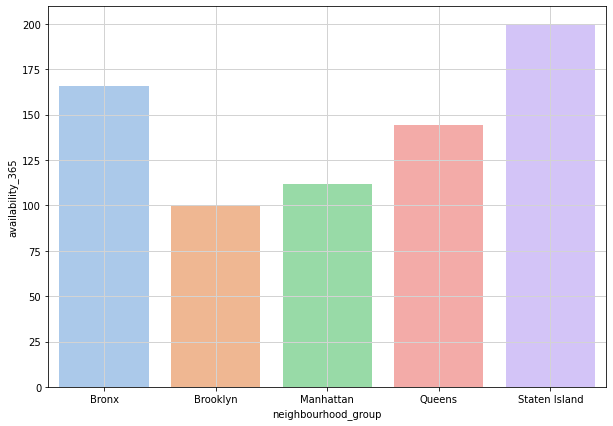

In [88]:
# Bar plot visualisation of average availabilty across different neigbourhood
plt.figure(figsize=(10,7))
ax = sns.barplot(x="neighbourhood_group", y="availability_365", data=avg_availabilty_airbnb_df, palette=sns.color_palette("pastel", 10))
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [89]:
# Average availability in each neigbhourhood
avg_availabilty_neigbhourhood_airbnb_df =airbnb_file.groupby('neighbourhood')['availability_365'].mean().reset_index().sort_values(['availability_365'], ascending=False)
avg_availabilty_neigbhourhood_airbnb_df.rename(columns={'availability_365':'average_availability'})
avg_availabilty_neigbhourhood_airbnb_df.head()

,neighbourhood,availability_365
82,Fort Wadsworth,365.000000
42,Co-op City,364.000000
215,Willowbrook,351.000000
65,Eastchester,333.461538
165,Richmondtown,300.000000


In [90]:
# Count of hotels by availabilty
availability_counts_checker = airbnb_file[['name','availability_365']].groupby(['availability_365'])['availability_365'].count().reset_index(name='count_of_availability_days').sort_values(['availability_365'], ascending=[False])
availability_counts_checker.head(5)

,availability_365,count_of_availability_days
365,365,1295
364,364,491
363,363,239
362,362,166
361,361,111


In [91]:
availability_counts_checker.tail()

,availability_365,count_of_availability_days
4,4,233
3,3,306
2,2,270
1,1,408
0,0,17533


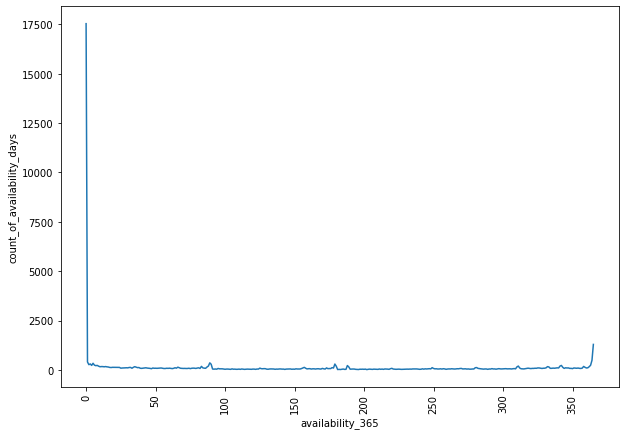

In [92]:
# plot of availability count
plt.figure(figsize=(10,7))
ax = sns.lineplot(x="availability_365", y="count_of_availability_days", data=availability_counts_checker, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
plt.show()

17533 is the count of zero's. This can tell us that most of the Host, rented their property for once and then most likely they did not. The reason for this is, In NewYork most of the people rent their own apartment to others if they go out of station. So this 17533 can be considered in that list. Again we connot make a judgment on only one possibily, their might be other resons too.

Looking at the above plot we can tell that Count of Zero's is supressing other significant features of the plot so let's drop the count of the Zero's in availabity_365 and study the plot more in details

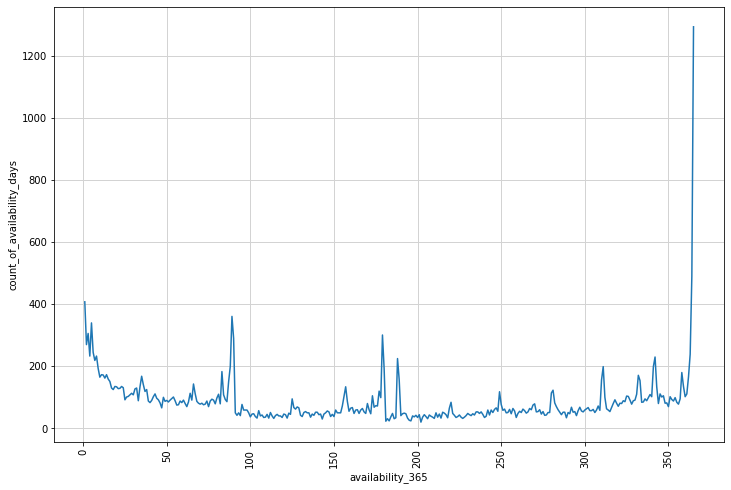

In [93]:
# Plot where count of availabilty is greater than 0
availability_counts_checker1 = availability_counts_checker[availability_counts_checker['availability_365'] >0]
plt.figure(figsize=(12,8))
ax = sns.lineplot(x="availability_365", y="count_of_availability_days", data=availability_counts_checker1, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

we can clearly see that there is sharp spike once in every ~90 days. This might be due that they are active for Few months and then they take break from Hosting. Finally, We can see there is Sharp rise in plot at 365 days.This shows us that most of the host Do full time business by hosting their property in airbnb.

#Reviews Analysis 🔃

In [94]:
# Creating dataframe of top 20 busiest hosts
busiest_hosts =Top_Host_ID_counts.head(20) 
busiest_hosts = busiest_hosts.reset_index()

busiest_hosts.head()

,host_id,0
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96


In [95]:
# Creating a list of id's of busiest host
busiest_hosts_list = pd.unique(busiest_hosts["host_id"]).tolist()

In [96]:
host_id__top20 = airbnb_df[airbnb_df['host_id'].isin(busiest_hosts_list)]

In [97]:
# Designate coordinate system
crs1 = {'init':"EPSG:4326"}
# Zip x and y coordinates into single feature 
geometry2 = [Point(xy) for xy in zip(host_id__top20['longitude'], host_id__top20['latitude'])]
# Create GeoPandas dataframe
host_id__top20_plot = gpd.GeoDataFrame(host_id__top20,crs = crs1,geometry = geometry2)

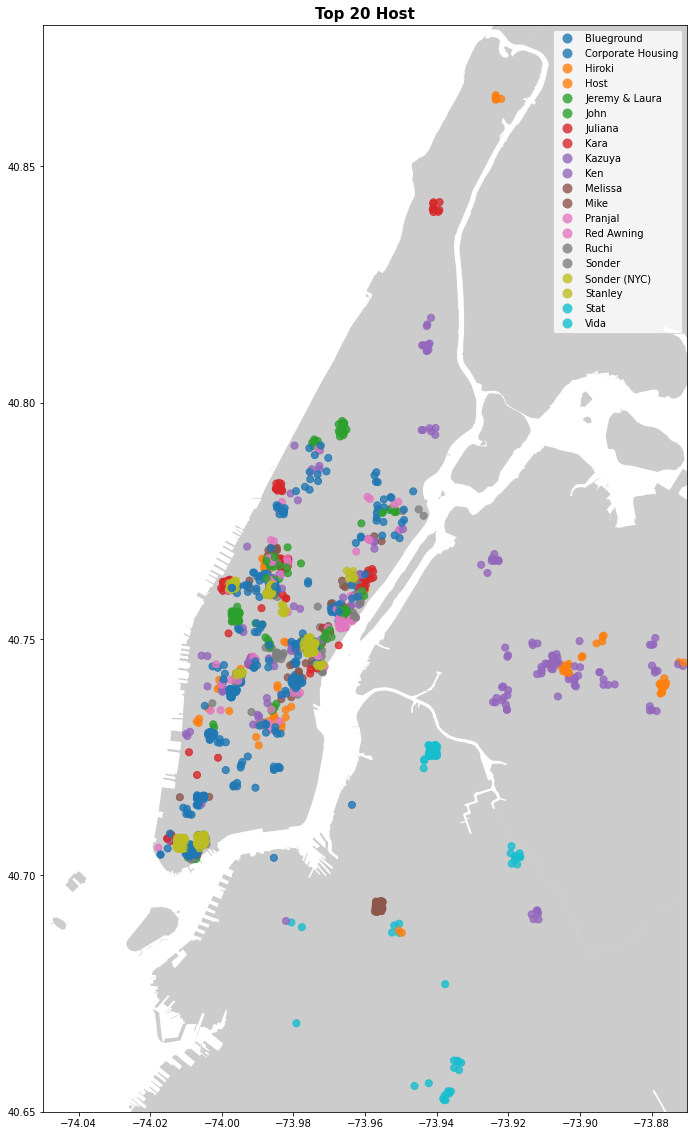

In [98]:
# Create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20,20))

# adding shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')

# Add geodataframe to axes, assigning host name variable to represent coordinates on graph, adding legend, making datapoints transparent using alpha, assigning size of points using markersize
host_id__top20_plot.plot(column = "host_name", ax=ax,alpha=0.8,legend=True,markersize=50)
# host_id__top20_plot.plot(column = "price", ax=ax,alpha=0.8,legend=True,markersize=10)
# Add title to graph
plt.title('Top 20 Host', fontsize=15,fontweight='bold')
# Set latitiude and longitude boundaries for map display
plt.xlim(-74.05,-73.87)
plt.ylim( 40.65,40.88)
plt.show()

The GeoPlot shows that Top 20 hosts are located mostly in Manhatten. While few of them from Top 20 Host are from Quuens or brooklyn.

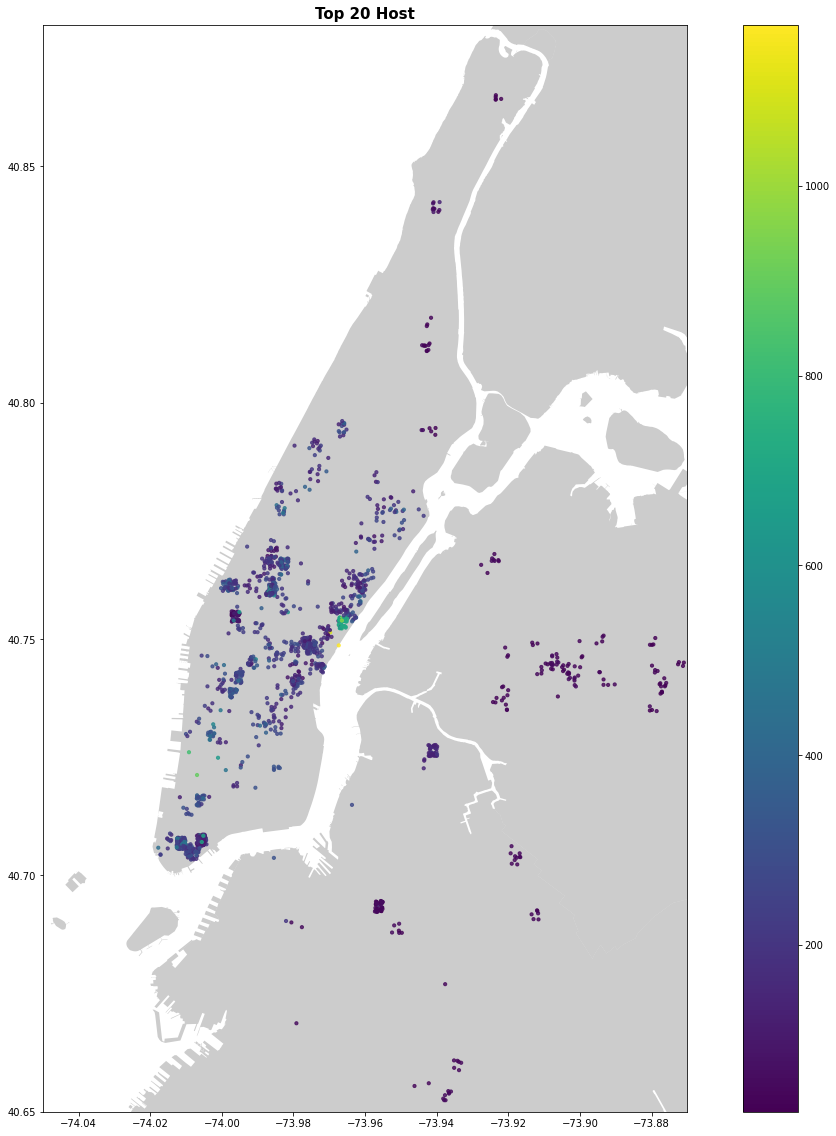

In [99]:
# Create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20,20))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')

# Add geodataframe to axes, assigning host name variable to represent coordinates on graph, adding legend, making datapoints transparent using alpha, assigning size of points using markersize
host_id__top20_plot.plot(column = "price", ax=ax,alpha=0.8,legend=True,markersize=10)
# Add title to graph
plt.title('Top 20 Host', fontsize=15,fontweight='bold')
# Set latitiude and longitude boundaries for map display
plt.xlim(-74.05,-73.87)
plt.ylim( 40.65,40.88)
plt.show()

This plot clearly shows us that the Top 20 Host's price is very less compared to the average price of that area.

## Analysis of Single Host 🥇⏫

Let's consider analysing single host at a time. In the first case let's take the busiest host Sonder(NYC) and analyse him completely 

In [100]:
# Dataframe of host-Sonder(NYC)
host_id_high = airbnb_df[airbnb_df['host_id']==219517861]

host_id_high.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,0.00,327,309,POINT (-74.00645 40.70637)
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219,POINT (-74.00641 40.70771)
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159,POINT (-74.00443 40.70743)
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91,POINT (-73.97614 40.74792)
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81,POINT (-73.97528 40.74771)


Review can be given only after the stay is over. Also we have last review given for each data. Now we have Sonder's Data. we can use his Last review date as the time scale and check out the variaton of other parameters with time.

So let's put Last review date (sorted) in X axis and compare the number of Reviews and price variation with time.

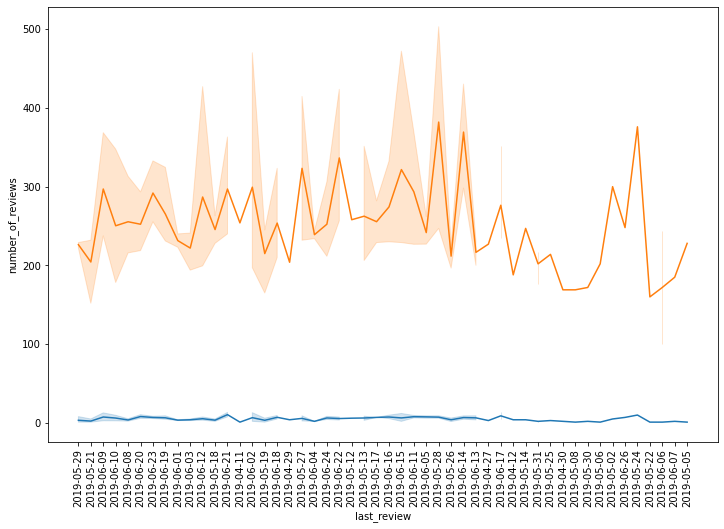

In [101]:
# Traffic of busiest host by last review
plt.figure(figsize=(12,8))
ax.plot = sns.lineplot(x="last_review", y="number_of_reviews", data=host_id_high, palette=sns.color_palette("pastel", 10))
ax.plot = sns.lineplot(x="last_review", y="price", data=host_id_high, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
plt.show()

Since the price values is too high and number of reviews is too less in unit we can't compare this number until we put them under same roof. So let's scale this numbers from 0 to 1 using MinMax scalar and put them in same Roof of units.

In [102]:
4# Scaling the values of required columns
scaler = MinMaxScaler()

scaled_airbnb = airbnb_df[["price", "number_of_reviews", "reviews_per_month"]]
scaled_airbnb = scaler.fit_transform(scaled_airbnb.to_numpy())
scaled_airbnb = pd.DataFrame(scaled_airbnb, columns=['price', 'number_of_reviews', 'reviews_per_month'])

scaled_airbnb.head()

,price,number_of_reviews,reviews_per_month
0,0.0149,0.014308,0.003590
1,0.0225,0.071542,0.006496
2,0.0150,0.000000,0.000000
3,0.0089,0.429253,0.079316
4,0.0080,0.014308,0.001709


In [103]:
# Concatenating two dataframes
scaled_airbnb_dropfile = airbnb_df.drop(["price", "number_of_reviews", "reviews_per_month"],axis='columns')

scaled_airbnb1 = pd.concat([scaled_airbnb_dropfile,scaled_airbnb], axis=1)
scaled_airbnb_dropfile.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,last_review,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,2018-10-19,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,2019-05-21,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,NaN,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,2019-07-05,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,2018-11-19,1,0,POINT (-73.94399 40.79851)


In [104]:
# Function to compare price & number of review with last reviewed date  
def price_Review_comparision(host_id_extract = 219517861 , on_what = "number_of_reviews" ) :
  # Converting on What Column name To string
  on_what = str(on_what)
  # Converting Host Id To string. 
  host_id_extract = int(host_id_extract)

  # Extracting the Required Host ID. 
  host_id_high = scaled_airbnb1[scaled_airbnb1['host_id']==host_id_extract]

  # Sorting the Time Line of Last review. 
  host_id_high = host_id_high.sort_values('last_review')

  # Setting up line Plot. 
  plt.figure(figsize=(12,8))
  ax.plot = sns.lineplot(x="last_review", y= on_what, data=host_id_high, color='red',label=on_what)
  ax.plot = sns.lineplot(x="last_review", y="price", data=host_id_high, color='blue',label="price" )
  plt.xticks(rotation='vertical')
  plt.xlabel("Timeline")
  plt.ylabel("Scaled Column")
  plt.show()                  
  return None 


Let's make a Function, where we can find the Time series plot of the following:


    1. Number of review and Price  Vs Last Review 
    2. Review per Month and Price Vs Last review 
The pythonn function is created in a flexible manner such that it has two parameters:
    

*   Host_Id_Extract : This parameter takes Host Id as the input. We can give any host Id, So that the analysis is based on him.
*   on_what : on_what can be given two inputs, One is number of review and another input is reviews per month 

Price  for the plot is fixed, While On what parameter decides the another parameter to be compared with.

By default the Host_id_extract is given as "219517861" and on_what is set as "number_of_reviews"  



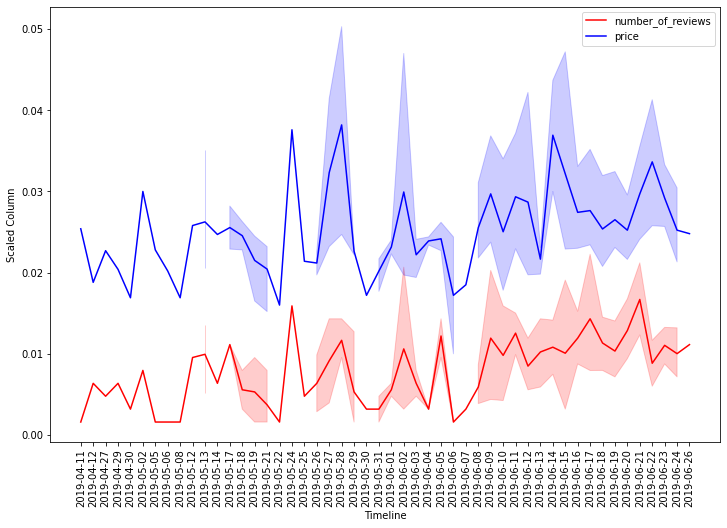

In [105]:
# Plot showing variation of price and review per month by last_review time
price_Review_comparision()

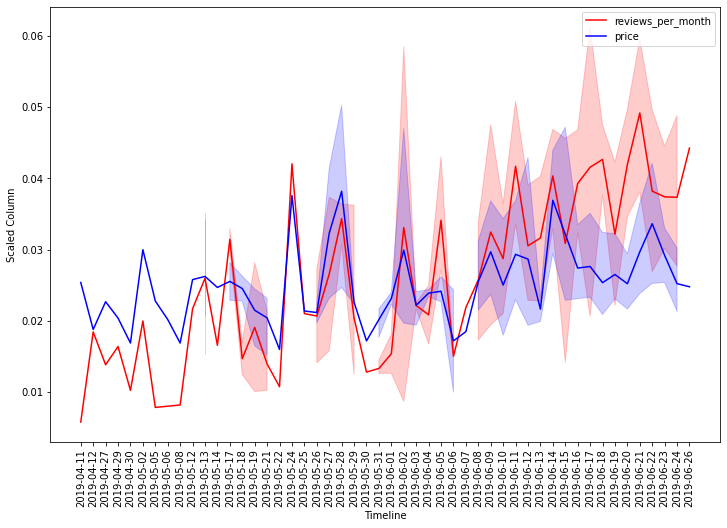

In [106]:
price_Review_comparision(on_what= "reviews_per_month")

Both the above plot shows us that there is high positive correlation between Price and Reviews. If the Number of reviews or reviews per month increases the price is also increasing. If the number of reviews decrease the price is also decreased.

Based on the plot we can comprehend that if the reviews increase the demand for the Host is also increasing hence Price is also increased by the Host and vice versa if the Review decreases and hence the price is decreased by the host.

## Let's take Diffrent Host this Time 🤔 

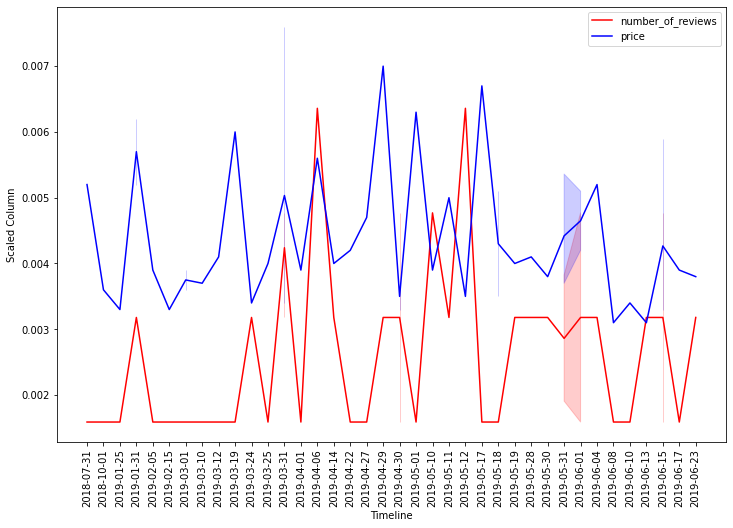

In [107]:
# Plot showing variation of price and review per month by lastreview time of host_id 137358866
# price_Review_comparision(host_id_extract= 137358866, on_what = "reviews_per_month")
price_Review_comparision(host_id_extract= 137358866	)

This plot clearly suggest us that with increase in the reviews the prices is also increasing, and vice versa.

#**Thank You! 🙏**